In [1]:
!pip install yfinance

import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')


/tmp/ipython-input-4042732869.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open    Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL     GOOGL
Date                                                            
2015-01-02  26.319654  26.630291  26.236650  26.471244  26480000
2015-01-05  25.818159  26.242117  25.733170  26.200367  41182000
2015-01-06  25.180981  25.905136  25.126805  25.869848  54456000
2015-01-07  25.106926  25.422036  25.032374  25.395198  46918000
2015-01-08  25.194403  25.223726  24.603445  24.926012  73054000

Data Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   2515 non-null   float64
 1   (High, GOOGL)    2515 non-null   float64
 2   (Low, GOOGL)     2515 non-null   float64
 3   (Open, GOOGL)    2515 non-null   float64
 4   (Volume, GOOGL)  2515 non-null   int64  
dtypes: float64

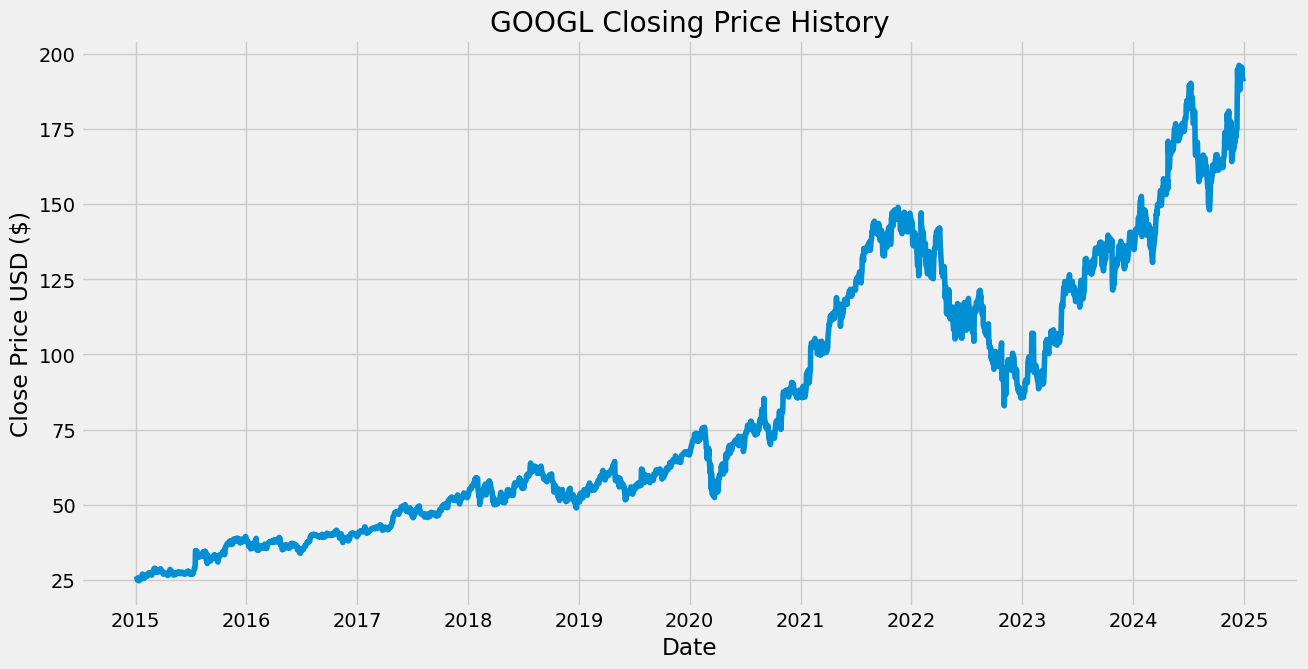

In [2]:
ticker = 'GOOGL'
start_date = '2015-01-01'
end_date = '2024-12-31'

df = yf.download(ticker, start=start_date, end=end_date)
print(df.head())
print("\nData Information:")
df.info()

plt.figure(figsize=(14, 7))
plt.title(f'{ticker} Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [6]:
data = df[['Close']]

dataset = data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

print(f"Shape of the dataset is now: {dataset.shape}")

Shape of the dataset is now: (2515, 1)


In [7]:
timesteps = 60

train_data_len = int(np.ceil(len(dataset) * .8))

train_data = scaled_data[0:train_data_len, :]

X_train = []
y_train = []

for i in range(timesteps, len(train_data)):

    X_train.append(train_data[i-timesteps:i, 0])

    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(f"Shape of X_train: {X_train.shape}")

Shape of X_train: (1952, 60, 1)


In [8]:

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X_train, y_train, batch_size=32, epochs=25)

Epoch 1/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0287
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0014
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0014
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0011
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0013
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0011
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0011
Epoch 8/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 8.9963e-04
Epoch 9/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 8.8773e-04
Epoch 10/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 8.5772e-04
Epoch 11/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0010
Epoch 12/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0010
Epoch 13/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 7.8856e-04
Epoch 14/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 7.4210e-04
Epoch 15/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step

In [10]:

test_data = scaled_data[train_data_len - timesteps:, :]

X_test = []
y_test = dataset[train_data_len:, :]

for i in range(timesteps, len(test_data)):
    X_test.append(test_data[i-timesteps:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [11]:

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Root Mean Squared Error (RMSE): 6.06


/tmp/ipython-input-1373839729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


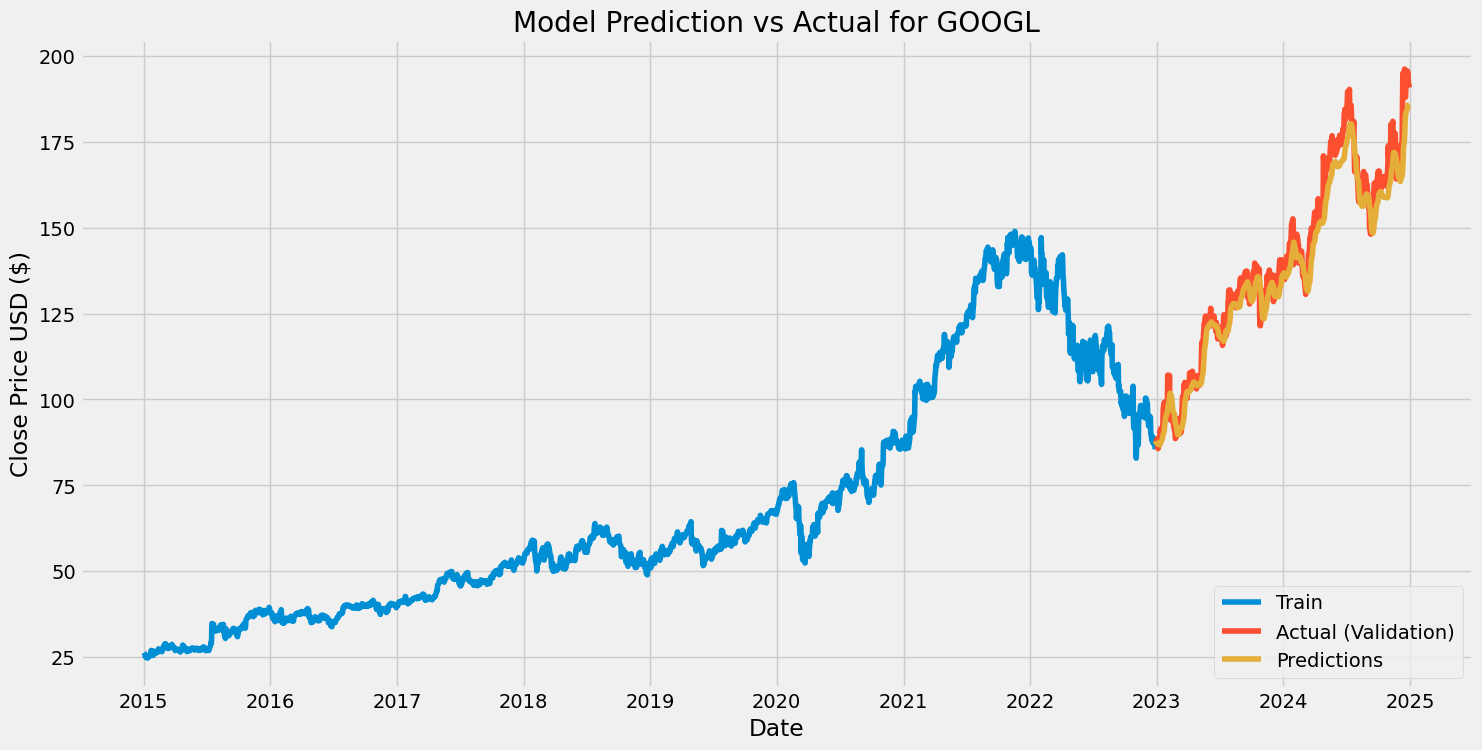


Validation Data with Predictions:
Price            Close Predictions
Ticker           GOOGL            
Date                              
2024-12-16  196.196259  175.905716
2024-12-17  194.959167  178.744705
2024-12-18  187.955734  181.275101
2024-12-19  188.065460  182.811432
2024-12-20  190.958633  183.632568
2024-12-23  194.171036  184.152328
2024-12-24  195.647552  184.675446
2024-12-26  195.138748  185.257111
2024-12-27  192.305435  185.777603
2024-12-30  190.789047  185.984909


In [12]:
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title(f'Model Prediction vs Actual for {ticker}')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'], label='Training Data')
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual (Validation)', 'Predictions'], loc='lower right')
plt.show()

print("\nValidation Data with Predictions:")
print(valid.tail(10))

In [15]:
input_ticker = 'GOOGL'

try:
    stock_df = yf.download(input_ticker, start='2020-01-01', end=pd.to_datetime('today').strftime('%Y-%m-%d'))
    if stock_df.empty:
        print(f"No data found for ticker {input_ticker}. Please check the symbol.")
    else:

        data = stock_df[['Close']]

        last_timesteps = data[-timesteps:].values

        # Scale the data to be values between 0 and 1
        last_timesteps_scaled = scaler.transform(last_timesteps)

        X_predict = []
        X_predict.append(last_timesteps_scaled)

        # Convert the X_predict data set to a numpy array
        X_predict = np.array(X_predict)

        # Reshape the data for the LSTM model
        X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))

        # Get the predicted scaled price
        predicted_price_scaled = model.predict(X_predict)

        # Undo the scaling
        predicted_price = scaler.inverse_transform(predicted_price_scaled)


        latest_actual_price = data['Close'].iloc[-1]
        latest_date = data.index[-1].strftime('%Y-%m-%d')

        print("--------------------------------------------------")
        print(f"Prediction for {input_ticker} on the next trading day:")
        print(f"Predicted Closing Price: ${predicted_price[0][0]:.2f}")
        print("--------------------------------------------------")
        print(f"For reference:")
        print(f"The actual closing price on {latest_date} was: ${latest_actual_price:.2f}")
        print("--------------------------------------------------")

except Exception as e:
    print(f"An error occurred: {e}")

/tmp/ipython-input-2397133578.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download(input_ticker, start='2020-01-01', end=pd.to_datetime('today').strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
--------------------------------------------------
Prediction for GOOGL on the next trading day:
Predicted Closing Price: $204.09
--------------------------------------------------
For reference:
An error occurred: unsupported format string passed to Series.__format__
